In [2]:
!pip install pdf2image
!pip install python-poppler-qt5
!pip install layoutparser torchvision
!pip install "git+https://github.com/facebookresearch/detectron2.git@v0.5#egg=detectron2"
!pip install "layoutparser[ocr]"
!pip install opencv-python-headless
!pip install tabula-py

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 57.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 7.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 435.0/435.0 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.4/120.4 kB 15.5 MB/s eta 0:00:00
  Attempting uninstall: google-api-core
    Found existing installation: google-api-core 2.11.1
    Uninstalling google-api-core-2.11.1:
      Successfully uninstalled google-api-core-2.11.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-gbq 0.19.2 requires google-api-core<3.0.0dev,>=2.10.2, but you have google-api-core 1.34.1 which is incompatible.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 46.9 MB/s eta 0:00:00


In [1]:
import pdf2image
import os
import layoutparser as lp
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tabula

In [2]:
!apt-get install -y poppler-utils


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
poppler-utils is already the newest version (22.02.0-2ubuntu0.4).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [3]:
from google.colab import files
uploaded = files.upload()

Saving attention is all you need.pdf to attention is all you need (1).pdf


In [4]:
import pdf2image
import os

# Get the name of the uploaded PDF file
pdf_path = list(uploaded.keys())[0]

# Convert the PDF to images
doc = pdf2image.convert_from_path(pdf_path)

# Print the number of pages and visualize the first page
print(f"Number of pages: {len(doc)}")
doc[0].show()  # Visualize the first page

Number of pages: 15


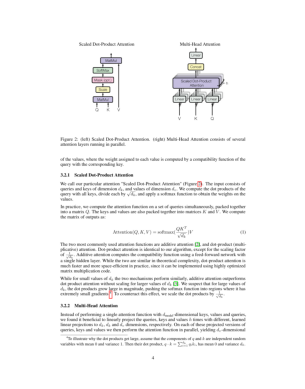

In [5]:
import matplotlib.pyplot as plt

# Display the first page
plt.imshow(doc[3])
plt.axis('off')  # Hide the axis
plt.show()

In [6]:
folder = "doc"
if not os.path.exists(folder):
    os.makedirs(folder)

for p, page in enumerate(doc, start=1):
    image_name = f"page_{p}.jpg"
    page.save(os.path.join(folder, image_name), "JPEG")

In [7]:
model = lp.Detectron2LayoutModel(
   "lp://PubLayNet/mask_rcnn_X_101_32x8d_FPN_3x/config",
   extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8],
   label_map={0: "Text", 1: "Title", 2: "List", 3: "Table", 4: "Figure"}
)

  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


/usr/local/lib/python3.10/dist-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


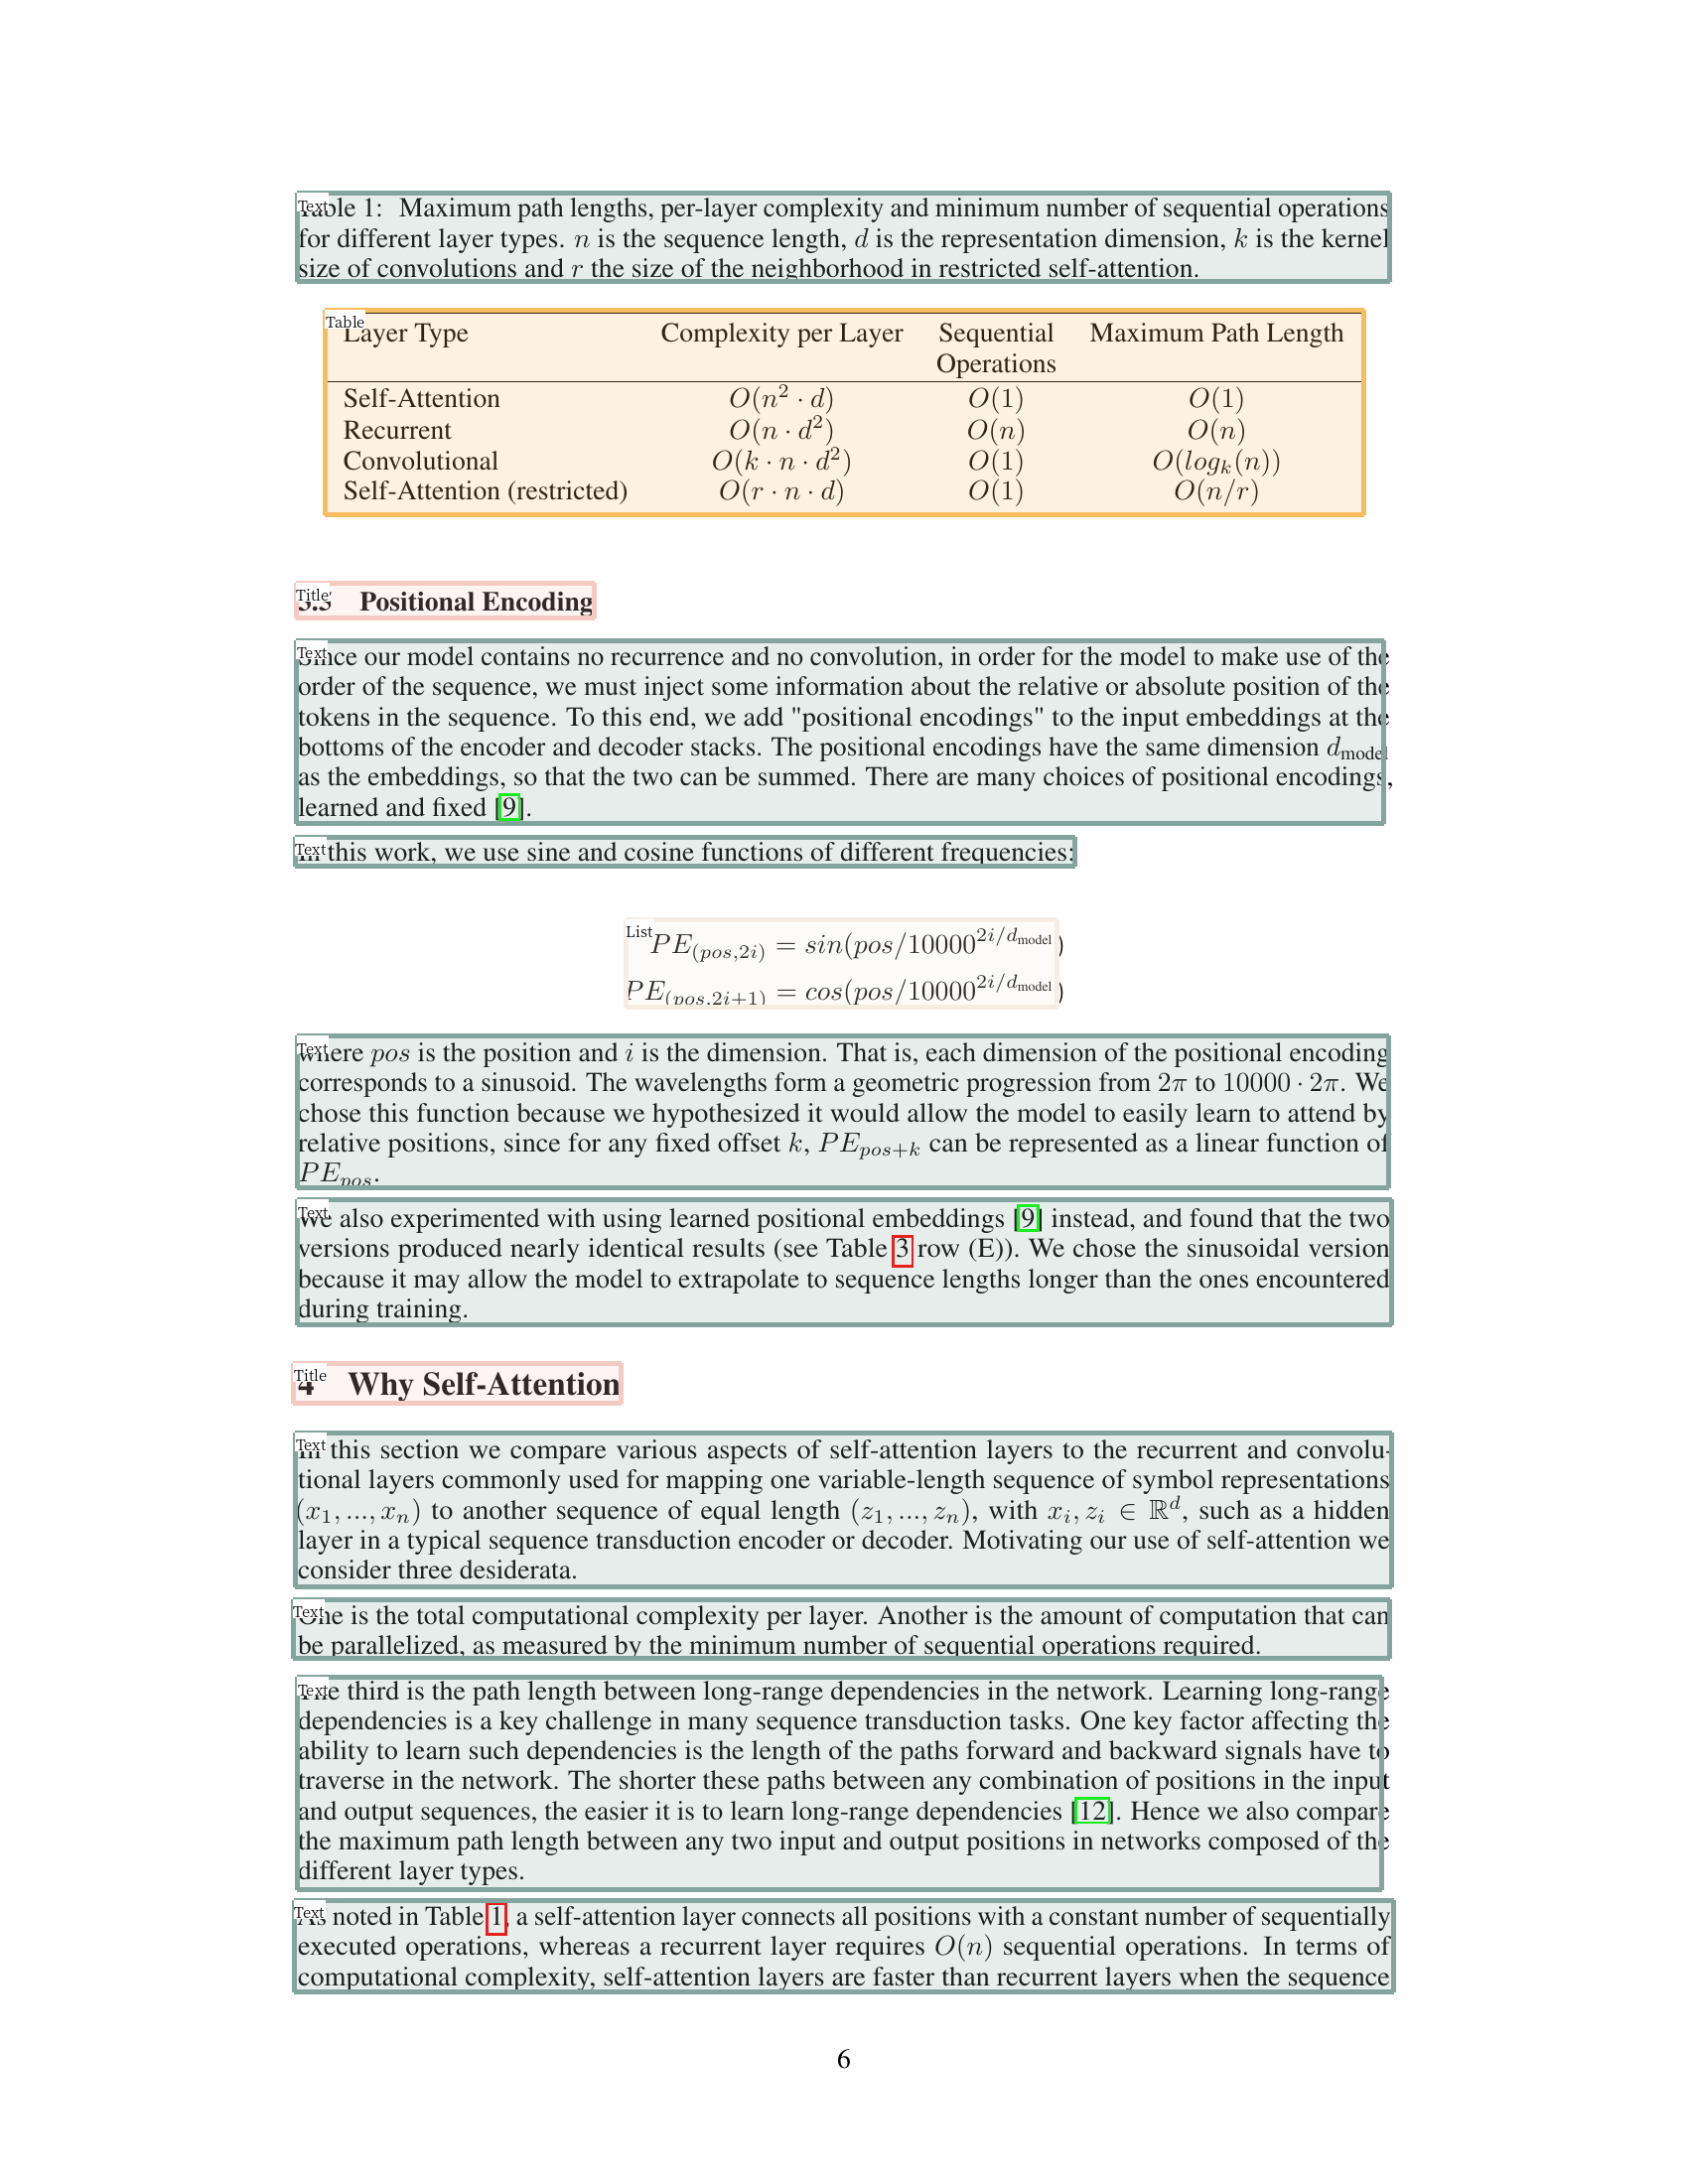

In [8]:
## turn img into array
i = 5
img = np.asarray(doc[i])
## predict
detected = model.detect(img)
## plot
lp.draw_box(img, detected, box_width=5, box_alpha=0.2,
            show_element_type=True)

In [10]:
'''
{'0-Title': '...',
 '1-Text':  '...',
 '2-Figure': array([[ [0,0,0], ...]]),
 '3-Table': pd.DataFrame,
}
'''
def parse_doc(dic):
    for k,v in dic.items():
        if "Title" in k:
            print('\x1b[1;31m'+ v +'\x1b[0m')
        elif "Figure" in k:
            plt.figure(figsize=(10,5))
            plt.imshow(v)
            plt.show()
        else:
            print(v)
        print(" ")


In [28]:
pip install layoutparser[ocr]


In [30]:
!pip install google-cloud-vision==2.6.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 372.4/372.4 kB 2.7 MB/s eta 0:00:00
  Attempting uninstall: google-cloud-vision
    Found existing installation: google-cloud-vision 1.0.0
    Uninstalling google-cloud-vision-1.0.0:
      Successfully uninstalled google-cloud-vision-1.0.0


In [12]:
!apt install tesseract-ocr
!pip install pytesseract


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (3,601 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 121948 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

In [13]:
# load model
model = lp.TesseractAgent(languages='eng')
dic_predicted = {}
for block in [block for block in detected if block.type in ["Title","Text"]]:
    ## segmentation
    segmented = block.pad(left=15, right=15, top=5,
                bottom=5).crop_image(img)
    ## extraction
    extracted = model.detect(segmented)
    ## save
    dic_predicted[str(block.id)+"-"+block.type] =  extracted.replace('\n',' ').strip()
# check
parse_doc(dic_predicted)

One is the total computational complexity per layer. Another is the amount of computation that can be parallelized, as measured by the minimum number of sequential operations required.
 
3.5 Positional Encoding
 


In [16]:
labels = {0: "Text", 1: "Title", 2: "List", 3: "Table", 4: "Figure"}
for label in labels.values():
    os.makedirs(f'{label}_images', exist_ok=True)

In [21]:
import io
# Check detected elements
for block in detected:
    print(f"--- {block.id}: {block.type} ---")
    print(block, end='\n\n')

# Initialize Tesseract OCR agent
ocr_agent = lp.TesseractAgent(languages='eng')

# Dictionary to hold extracted content
dic_predicted = {}

# Extract titles and texts
for block in [block for block in detected if block.type in ["Title", "Text"]]:
    segmented = block.pad(left=15, right=15, top=5, bottom=5).crop_image(img)
    extracted_text = ocr_agent.detect(segmented).replace('\n', ' ').strip()
    dic_predicted[f"{block.id}-{block.type}"] = extracted_text


# Extract figures
for block in [block for block in detected if block.type == "Figure"]:
    segmented = block.pad(left=15, right=15, top=5, bottom=5).crop_image(img)
    dic_predicted[f"{block.id}-{block.type}"] = segmented

# Extract tables
for block in [block for block in detected if block.type == "Table"]:
    segmented = block.pad(left=15, right=15, top=5, bottom=5).crop_image(img)
    extracted_table = ocr_agent.detect(segmented)
    dic_predicted[f"{block.id}-{block.type}"] = pd.read_csv(io.StringIO(extracted_table))


--- None: Text ---
TextBlock(block=Rectangle(x_1=299.6609802246094, y_1=1689.573974609375, x_2=1391.6861572265625, y_2=1903.2991943359375), text=None, id=None, type=Text, parent=None, next=None, score=0.9983506202697754)

--- None: Text ---
TextBlock(block=Rectangle(x_1=298.6244201660156, y_1=645.4981079101562, x_2=1393.3232421875, y_2=829.3812866210938), text=None, id=None, type=Text, parent=None, next=None, score=0.9978437423706055)

--- None: Text ---
TextBlock(block=Rectangle(x_1=297.5263977050781, y_1=1443.09814453125, x_2=1401.37109375, y_2=1598.227294921875), text=None, id=None, type=Text, parent=None, next=None, score=0.99570232629776)

--- None: Text ---
TextBlock(block=Rectangle(x_1=299.636474609375, y_1=194.60049438476562, x_2=1399.76416015625, y_2=283.56060791015625), text=None, id=None, type=Text, parent=None, next=None, score=0.9946402907371521)

--- None: Title ---
TextBlock(block=Rectangle(x_1=295.8746032714844, y_1=1373.3856201171875, x_2=625.376953125, y_2=1413.594604